In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
de = pd.read_csv('delivery_time.csv')

In [3]:
de.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
de.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
Delivery Time    21 non-null float64
Sorting Time     21 non-null int64
dtypes: float64(1), int64(1)
memory usage: 416.0 bytes


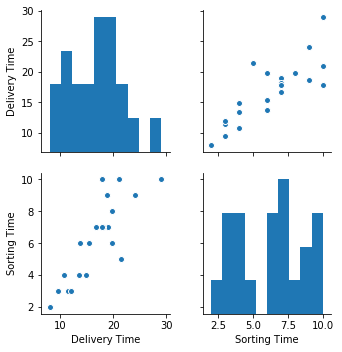

In [5]:
sns.pairplot(de)

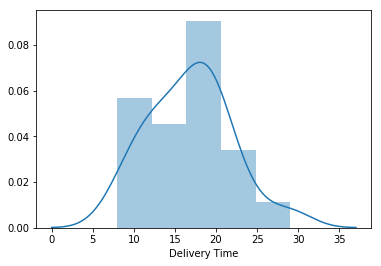

In [6]:
sns.distplot(de['Delivery Time'])

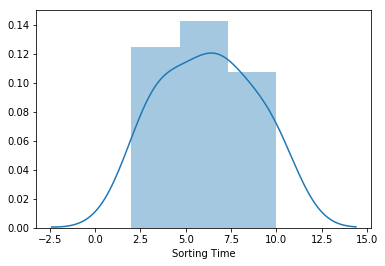

In [7]:
sns.distplot(de['Sorting Time'])

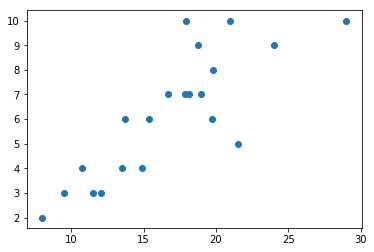

In [9]:
plt.scatter(de['Delivery Time'],de['Sorting Time'])

In [10]:
de.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [39]:
X = de['Sorting Time'].values.reshape(-1,1)
print(X)

[[10]
 [ 4]
 [ 6]
 [ 9]
 [10]
 [ 6]
 [ 7]
 [ 3]
 [10]
 [ 9]
 [ 8]
 [ 4]
 [ 7]
 [ 3]
 [ 3]
 [ 4]
 [ 6]
 [ 7]
 [ 2]
 [ 7]
 [ 5]]


In [40]:
Y = de['Delivery Time'].values.reshape(-1,1)
print(Y)

[[ 21.  ]
 [ 13.5 ]
 [ 19.75]
 [ 24.  ]
 [ 29.  ]
 [ 15.35]
 [ 19.  ]
 [  9.5 ]
 [ 17.9 ]
 [ 18.75]
 [ 19.83]
 [ 10.75]
 [ 16.68]
 [ 11.5 ]
 [ 12.03]
 [ 14.88]
 [ 13.75]
 [ 18.11]
 [  8.  ]
 [ 17.83]
 [ 21.5 ]]


In [134]:
from sklearn.model_selection import train_test_split

In [174]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.5)

In [175]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

model = lm.fit(X_train,Y_train)

In [176]:
print(lm.intercept_)

[ 3.56873134]


In [177]:
print(lm.coef_)

[[ 2.04003731]]


In [178]:
model.score(X_train,Y_train)  #R^2 value 

0.78948436348141704

In [179]:
predictions = model.predict(X_test)

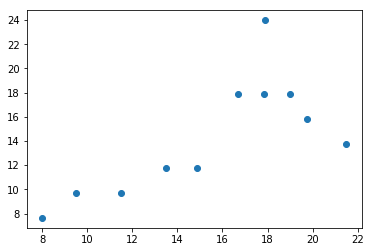

In [180]:
plt.scatter(Y_test,predictions)

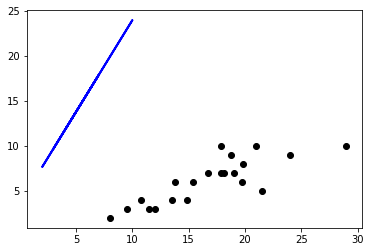

In [181]:


plt.scatter(
    de['Delivery Time'],
    de['Sorting Time'],
    c='black'
)
plt.plot(
    X_test,
    predictions,
    c='blue',
    linewidth=2
)

In [182]:
from sklearn import metrics

In [183]:
print('MAE',metrics.mean_absolute_error(Y_test,predictions))

MAE 2.48669606513


In [53]:
print('MSE',metrics.mean_squared_error(Y_test,predictions))

MSE 9.32761341513


In [54]:
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,predictions)))

RMSE 3.05411417847
